In [1]:
import numpy as np
import pandas as pd
import itertools
import joblib
import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score,ConfusionMatrixDisplay

from preprocessing import data_preprocessing




random_seed=24

In [2]:
data=pd.read_csv("./data/final_data.csv")

In [3]:
data.head()

,CustomerID,Gender,Age,Tenure,MonthlyCharges,TotalCharges,PaymentMethod,Churn,ServiceUsage1,ServiceUsage2,ServiceUsage3
0,CUST0001,Male,20.0,5.0,62.31,2950.41,Credit Card,Yes,59.0,20.0,63.0
1,CUST0002,Female,25.0,23.0,118.96,7460.55,Bank Transfer,No,42.0,41.0,136.0
2,CUST0003,Female,25.0,39.0,69.20,3064.73,Bank Transfer,No,65.0,0.0,165.0
3,CUST0004,Male,56.0,47.0,145.90,2612.22,Cash,No,64.0,40.0,169.0
4,CUST0005,Female,33.0,69.0,88.51,4833.99,Cash,No,62.0,1.0,54.0


### Preprocessing of Data 

In [4]:
X_train,X_test,y_train,y_test=data_preprocessing(data,save_preprocessor_path="./models/preprocessor.pkl")

sucessfully saved the preprocssor at ./models/preprocessor.pkl


In [5]:
X_train

,num__Age,num__Tenure,num__MonthlyCharges,num__TotalCharges,num__ServiceUsage1,num__ServiceUsage2,num__ServiceUsage3,num__AverageServiceUsage,num__AverageCharges,cat__Gender_Female,cat__Gender_Male,cat__PaymentMethod_Bank Transfer,cat__PaymentMethod_Cash,cat__PaymentMethod_Credit Card,cat__PaymentMethod_PayPal
204,-0.233498,0.542383,-1.073798,-0.466764,-0.335536,-0.610418,1.367187,0.886216,-0.393457,1.0,0.0,0.0,1.0,0.0,0.0
1402,-0.630237,-0.623248,-1.574817,0.857392,1.736417,-1.420365,-0.915857,-0.344944,-0.053265,1.0,0.0,0.0,1.0,0.0,0.0
2139,0.661256,-0.024344,1.082594,-0.624559,1.204780,-1.489793,-0.218497,0.006770,-0.374930,0.0,1.0,0.0,1.0,0.0,0.0
75,0.802251,-0.980443,0.218745,0.636904,0.705647,-0.263761,-0.018197,0.225257,0.098235,1.0,0.0,0.0,0.0,1.0,0.0
948,-1.085862,-1.668050,0.685947,0.684579,-0.202451,-0.914959,1.453161,0.950522,4.661423,0.0,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
334,-1.249239,0.310474,-0.204055,-0.669664,0.484884,-1.709932,0.966222,0.659680,-0.400097,1.0,0.0,1.0,0.0,0.0,0.0
1934,-1.402485,0.047099,-1.509259,1.308669,-1.081448,0.487671,-1.824776,-1.893993,-0.171961,1.0,0.0,1.0,0.0,0.0,0.0
2094,1.579146,-0.371075,-0.482791,0.572607,1.473997,-0.057734,-0.154513,0.476114,-0.174998,0.0,1.0,0.0,1.0,0.0,0.0
2093,0.215911,1.581145,1.331277,-0.262686,-0.921912,1.282825,-0.758270,-0.757501,-0.416059,0.0,1.0,0.0,0.0,0.0,1.0


## Logistic Regression

### Selection of C in logistic regression

In [6]:
log_C=[0.01,0.1,1,10,100]
log_train_pred=[]
log_test_pred=[]
for c in log_C:
    model=LogisticRegression(C=c,random_state=random_seed)
    model.fit(X_train,y_train)
    log_train_pred.append(model.predict(X_train))
    log_test_pred.append(model.predict(X_test))

In [8]:
log_train_accuracy=[accuracy_score(y_pred=x,y_true=y_train) for x in log_train_pred]
log_test_accuracy=[accuracy_score(y_pred=x,y_true=y_test) for x in log_test_pred]

Text(0, 0.5, 'accuracy')

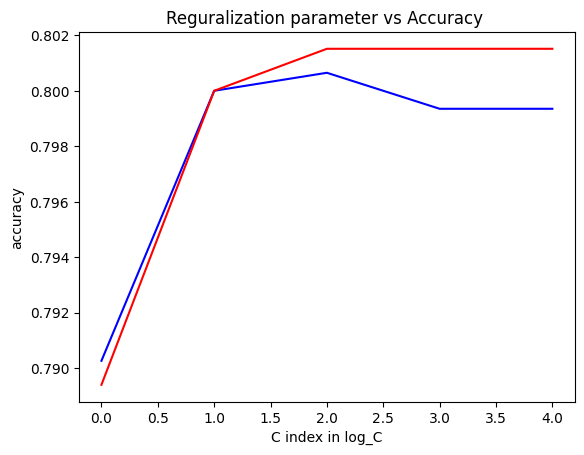

In [9]:
plt.plot(log_train_accuracy,color="blue")
plt.plot(log_test_accuracy,color="red")
plt.title("Reguralization parameter vs Accuracy ")
plt.xlabel("C index in log_C")
plt.ylabel("accuracy")

In [10]:
log_reg_best_c=log_C[2]

### training of the Decisition tree

In [11]:
dt_max_depth=list(range(3,30,3))
dt_min_samples_split=list(range(2,11,2))
dt_min_samples_leaf=list(range(1,5,1))
dt_params=[dt_max_depth,dt_min_samples_split,dt_min_samples_leaf]

dt_all_comb_params=[]
for t in itertools.product(*dt_params):
    dt_all_comb_params.append(t)


In [12]:
dt_train_pred=[]
dt_test_pred=[]
for params in dt_all_comb_params:
    model=DecisionTreeClassifier(max_depth=params[0],min_samples_split=params[1],min_samples_leaf=params[2],random_state=random_seed)
    model.fit(X_train,y_train)
    dt_train_pred.append(model.predict(X_train))
    dt_test_pred.append(model.predict(X_test))

In [13]:
dt_train_accuracy=[accuracy_score(y_pred=x,y_true=y_train) for x in dt_train_pred]
dt_test_accuracy=[accuracy_score(y_pred=x,y_true=y_test) for x in dt_test_pred]

In [14]:
dt_results=pd.DataFrame(data=dt_all_comb_params,columns=["max_depth","min_samples_split","min_samples_leaf"])
dt_results["train_accuracy"]=dt_train_accuracy
dt_results["test_accuracy"]=dt_test_accuracy

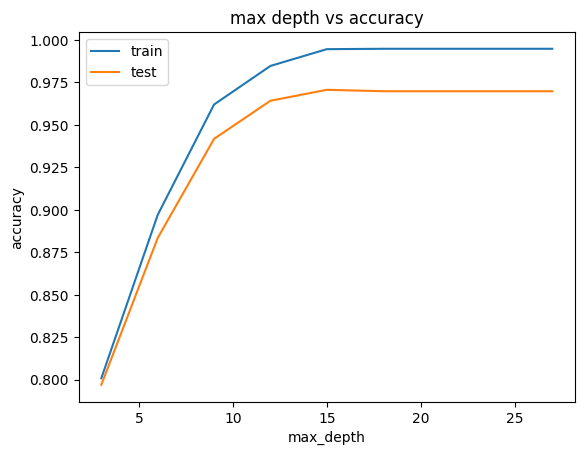

In [15]:
plt.plot(dt_results.groupby("max_depth").mean().index.values,dt_results.groupby("max_depth").mean()["train_accuracy"].values,label="train")
plt.plot(dt_results.groupby("max_depth").mean().index.values,dt_results.groupby("max_depth").mean()["test_accuracy"].values,label="test")
plt.title("max depth vs accuracy")
plt.xlabel("max_depth")
plt.ylabel("accuracy")
plt.legend()

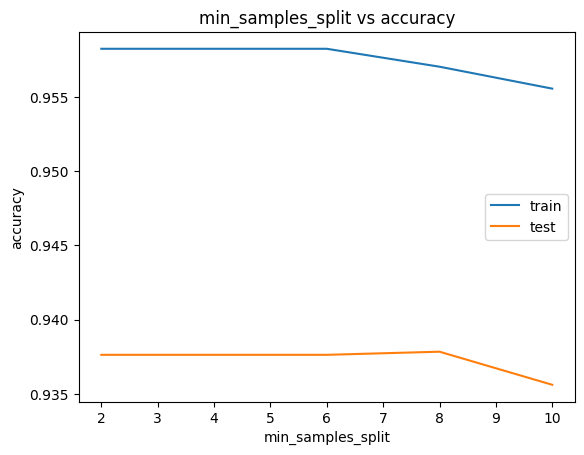

In [16]:
plt.plot(dt_results.groupby("min_samples_split").mean().index.values,dt_results.groupby("min_samples_split").mean()["train_accuracy"].values,label="train")
plt.plot(dt_results.groupby("min_samples_split").mean().index.values,dt_results.groupby("min_samples_split").mean()["test_accuracy"].values,label="test")
plt.title("min_samples_split vs accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("accuracy")
plt.legend()

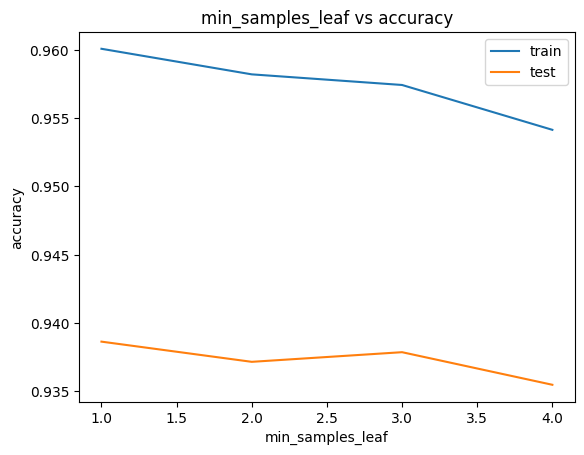

In [17]:
plt.plot(dt_results.groupby("min_samples_leaf").mean().index.values,dt_results.groupby("min_samples_leaf").mean()["train_accuracy"].values,label="train")
plt.plot(dt_results.groupby("min_samples_leaf").mean().index.values,dt_results.groupby("min_samples_leaf").mean()["test_accuracy"].values,label="test")
plt.title("min_samples_leaf vs accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("accuracy")
plt.legend()

In [18]:
dt_max_depth_best=9
dt_min_samples_split_best=6
dt_min_samples_leaf_best= 1
## here best in the case of overfitting and underfitiing 

### Analysing Random forest

#### getting all the combination for testing hyper parameters 

In [19]:
rf_n_estimators=list(range(50,501,50))
rf_max_depth=list(range(3,31,3))
rf_min_samples_split=list(range(2,11,2))
rf_min_samples_leaf=list(range(1,5,1))

rf_params=[rf_n_estimators,rf_max_depth,rf_min_samples_split,rf_min_samples_leaf]

rf_all_comb_params=[]
for t in itertools.product(*rf_params):
    rf_all_comb_params.append(t)

#### training the model and saving the predicted results by each model 

In [20]:
rf_train_pred=[]
rf_test_pred=[]
for params in rf_all_comb_params:
    model=RandomForestClassifier(n_estimators=params[0],max_depth=params[1],min_samples_split=params[2],min_samples_leaf=params[3],random_state=random_seed,n_jobs=-1)
    model.fit(X_train,y_train)
    rf_train_pred.append(model.predict(X_train))
    rf_test_pred.append(model.predict(X_test))

#### finding the accuracy score for the predicted values 

In [21]:
rf_train_accuracy=[accuracy_score(y_pred=x,y_true=y_train) for x in rf_train_pred]
rf_test_accuracy=[accuracy_score(y_pred=x,y_true=y_test) for x in rf_test_pred]

#### converting them into a dataframe for better analysis 

In [22]:
rf_results=pd.DataFrame(data=rf_all_comb_params,columns=["n_estimators","max_depth","min_samples_split","min_samples_leaf"])
rf_results["train_accuracy"]=rf_train_accuracy
rf_results["test_accuracy"]=rf_test_accuracy

#### plotting the accuracy of the model for test and train against the hyper parameters 

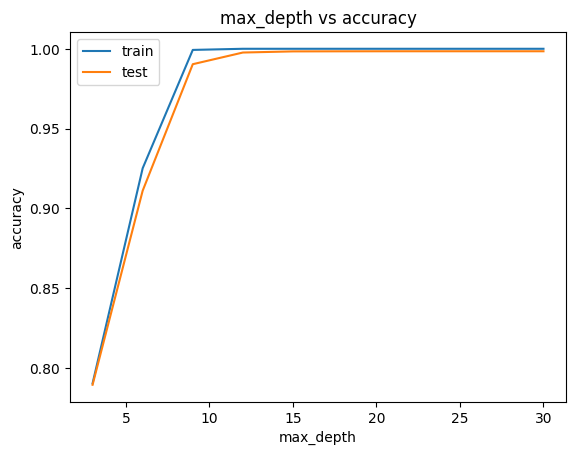

In [23]:
plt.plot(rf_results.groupby("max_depth").mean().index.values,rf_results.groupby("max_depth").mean()["train_accuracy"].values,label="train")
plt.plot(rf_results.groupby("max_depth").mean().index.values,rf_results.groupby("max_depth").mean()["test_accuracy"].values,label="test")
plt.title("max_depth vs accuracy")
plt.xlabel("max_depth")
plt.ylabel("accuracy")
plt.legend()

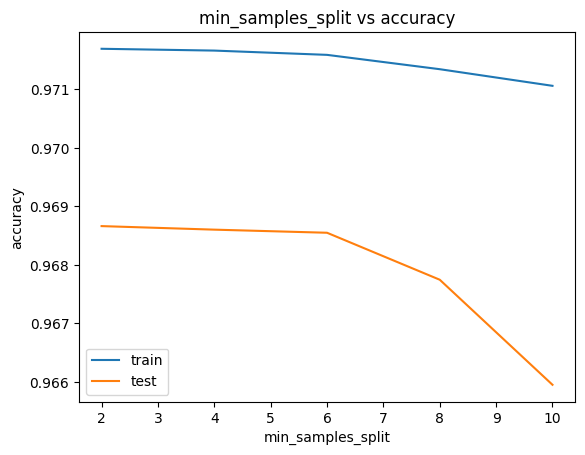

In [24]:
plt.plot(rf_results.groupby("min_samples_split").mean().index.values,rf_results.groupby("min_samples_split").mean()["train_accuracy"].values,label="train")
plt.plot(rf_results.groupby("min_samples_split").mean().index.values,rf_results.groupby("min_samples_split").mean()["test_accuracy"].values,label="test")
plt.title("min_samples_split vs accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("accuracy")
plt.legend()

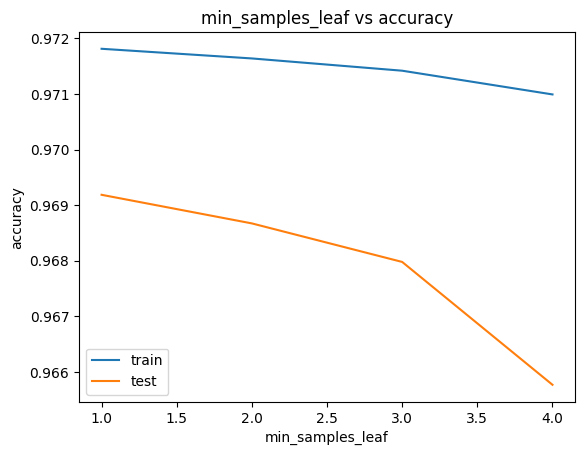

In [25]:
plt.plot(rf_results.groupby("min_samples_leaf").mean().index.values,rf_results.groupby("min_samples_leaf").mean()["train_accuracy"].values,label="train")
plt.plot(rf_results.groupby("min_samples_leaf").mean().index.values,rf_results.groupby("min_samples_leaf").mean()["test_accuracy"].values,label="test")
plt.title("min_samples_leaf vs accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("accuracy")
plt.legend()

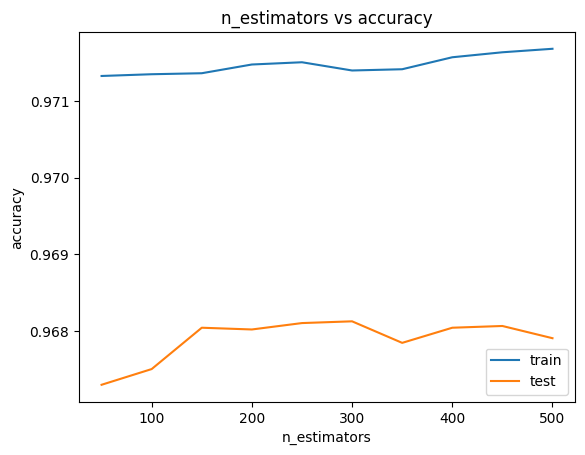

In [26]:
plt.plot(rf_results.groupby("n_estimators").mean().index.values,rf_results.groupby("n_estimators").mean()["train_accuracy"].values,label="train")
plt.plot(rf_results.groupby("n_estimators").mean().index.values,rf_results.groupby("n_estimators").mean()["test_accuracy"].values,label="test")
plt.title("n_estimators vs accuracy")
plt.xlabel("n_estimators")
plt.ylabel("accuracy")
plt.legend()

### after observing the graphs picking the best paramters for training 

In [27]:
rf_n_estimators_best=150
rf_max_depth_best=15
rf_min_samples_leaf_best=1
rf_min_samples_split_best=2
## here best case 

## Comapring Models Performance 

#### trianing models with best parameters 

In [28]:
best_logistic_model=LogisticRegression(C=log_reg_best_c,random_state=random_seed)
best_dt_model=DecisionTreeClassifier(max_depth=dt_max_depth_best,min_samples_split=dt_min_samples_split_best,min_samples_leaf=dt_min_samples_leaf_best,random_state=random_seed)
best_rf_model=RandomForestClassifier(n_estimators=rf_n_estimators_best,max_depth=rf_max_depth_best,min_samples_split=rf_min_samples_split_best,min_samples_leaf=rf_min_samples_leaf_best,random_state=random_seed)

In [29]:
best_logistic_model.fit(X_train,y_train)
best_dt_model.fit(X_train,y_train)
best_rf_model.fit(X_train,y_train)

RandomForestClassifier(max_depth=15, n_estimators=150, random_state=24)

#### calculating the scores for training set

In [30]:
best_log_pred_train=best_logistic_model.predict(X_train)
best_dt_pred_train=best_dt_model.predict(X_train)
best_rf_pred_train=best_rf_model.predict(X_train)
best_log_scores_train=[accuracy_score(y_pred=best_log_pred_train,y_true=y_train),precision_score(y_pred=best_log_pred_train,y_true=y_train),recall_score(y_pred=best_log_pred_train,y_true=y_train),f1_score(y_pred=best_log_pred_train,y_true=y_train)]
best_dt_scores_train=[accuracy_score(y_pred=best_dt_pred_train,y_true=y_train),precision_score(y_pred=best_dt_pred_train,y_true=y_train),recall_score(y_pred=best_dt_pred_train,y_true=y_train),f1_score(y_pred=best_dt_pred_train,y_true=y_train)]
best_rf_scores_train=[accuracy_score(y_pred=best_rf_pred_train,y_true=y_train),precision_score(y_pred=best_rf_pred_train,y_true=y_train),recall_score(y_pred=best_rf_pred_train,y_true=y_train),f1_score(y_pred=best_rf_pred_train,y_true=y_train)]
print("Train set Scores",end="\n -------------------------------------------------------------------------- \n ")
print(f"the scores for the Logistic model are \n \t accuracy: {best_log_scores_train[0]:.2f} | precison: {best_log_scores_train[1]:.2f} | recall: {best_log_scores_train[2]:.2f} | f1_score: {best_log_scores_train[3]:.2f} ",end="\n ---------------------------------------\n")
print(f"the scores for the Decistion tree  model are \n \t accuracy: {best_dt_scores_train[0]:.2f} | precison: {best_dt_scores_train[1]:.2f} | recall: {best_dt_scores_train[2]:.2f} | f1_score: {best_dt_scores_train[3]:.2f} ",end="\n ---------------------------------------\n")
print(f"the scores for the Random forest model are \n \t accuracy: {best_rf_scores_train[0]:.2f} | precison: {best_rf_scores_train[1]:.2f} | recall: {best_rf_scores_train[2]:.2f} | f1_score: {best_rf_scores_train[3]:.2f} ",end="\n ---------------------------------------\n")

Train set Scores
 -------------------------------------------------------------------------- 
 the scores for the Logistic model are 
 	 accuracy: 0.80 | precison: 0.83 | recall: 0.06 | f1_score: 0.12 
 ---------------------------------------
the scores for the Decistion tree  model are 
 	 accuracy: 0.96 | precison: 0.88 | recall: 0.96 | f1_score: 0.92 
 ---------------------------------------
the scores for the Random forest model are 
 	 accuracy: 1.00 | precison: 1.00 | recall: 1.00 | f1_score: 1.00 
 ---------------------------------------


### calculating the scores for test set 

In [31]:
best_log_pred=best_logistic_model.predict(X_test)
best_dt_pred=best_dt_model.predict(X_test)
best_rf_pred=best_rf_model.predict(X_test)


In [32]:
best_log_scores=[accuracy_score(y_pred=best_log_pred,y_true=y_test),precision_score(y_pred=best_log_pred,y_true=y_test),recall_score(y_pred=best_log_pred,y_true=y_test),f1_score(y_pred=best_log_pred,y_true=y_test)]
best_dt_scores=[accuracy_score(y_pred=best_dt_pred,y_true=y_test),precision_score(y_pred=best_dt_pred,y_true=y_test),recall_score(y_pred=best_dt_pred,y_true=y_test),f1_score(y_pred=best_dt_pred,y_true=y_test)]
best_rf_scores=[accuracy_score(y_pred=best_rf_pred,y_true=y_test),precision_score(y_pred=best_rf_pred,y_true=y_test),recall_score(y_pred=best_rf_pred,y_true=y_test),f1_score(y_pred=best_rf_pred,y_true=y_test)]

In [33]:
print("Test Set Scores",end="\n -------------------------------------------------------------------------- \n ")
print(f"the scores for the Logistic model are \n \t accuracy: {best_log_scores[0]:.2f} | precison: {best_log_scores[1]:.2f} | recall: {best_log_scores[2]:.2f} | f1_score: {best_log_scores[3]:.2f} ",end="\n ---------------------------------------\n")
print(f"the scores for the Decistion tree  model are \n \t accuracy: {best_dt_scores[0]:.2f} | precison: {best_dt_scores[1]:.2f} | recall: {best_dt_scores[2]:.2f} | f1_score: {best_dt_scores[3]:.2f} ",end="\n ---------------------------------------\n")
print(f"the scores for the Random forest model are \n \t accuracy: {best_rf_scores[0]:.2f} | precison: {best_rf_scores[1]:.2f} | recall: {best_rf_scores[2]:.2f} | f1_score: {best_rf_scores[3]:.2f} ",end="\n ---------------------------------------\n")


Test Set Scores
 -------------------------------------------------------------------------- 
 the scores for the Logistic model are 
 	 accuracy: 0.80 | precison: 0.90 | recall: 0.06 | f1_score: 0.12 
 ---------------------------------------
the scores for the Decistion tree  model are 
 	 accuracy: 0.94 | precison: 0.86 | recall: 0.87 | f1_score: 0.86 
 ---------------------------------------
the scores for the Random forest model are 
 	 accuracy: 1.00 | precison: 1.00 | recall: 1.00 | f1_score: 1.00 
 ---------------------------------------


#### plotting the confusion matrix 

Text(0.5, 1.0, 'Confusion matrix of Random forest model')

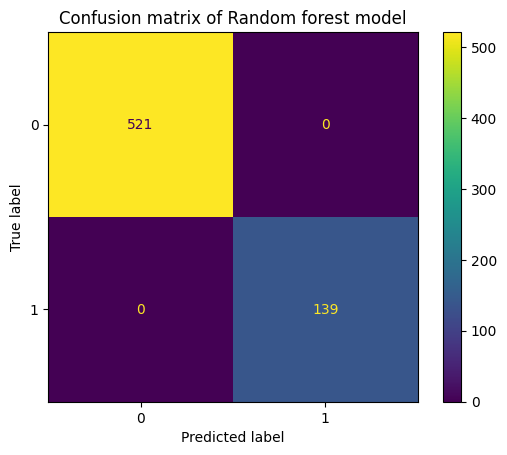

In [34]:
ConfusionMatrixDisplay.from_estimator(best_rf_model,X_test,y_test)
plt.title("Confusion matrix of Random forest model")

Text(0.5, 1.0, 'Confusion matrix of Decision tree model')

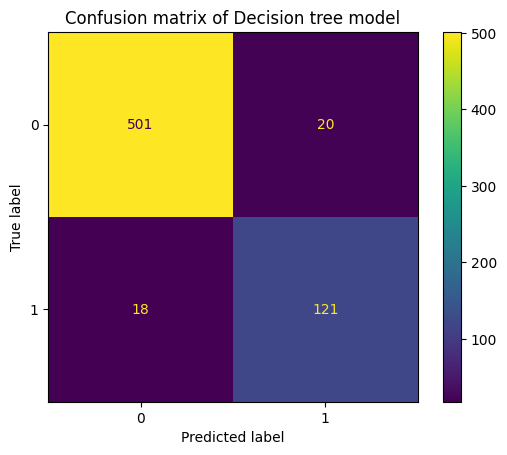

In [35]:
ConfusionMatrixDisplay.from_estimator(best_dt_model,X_test,y_test)
plt.title("Confusion matrix of Decision tree model")

Text(0.5, 1.0, 'Confusion matrix of Logistic model')

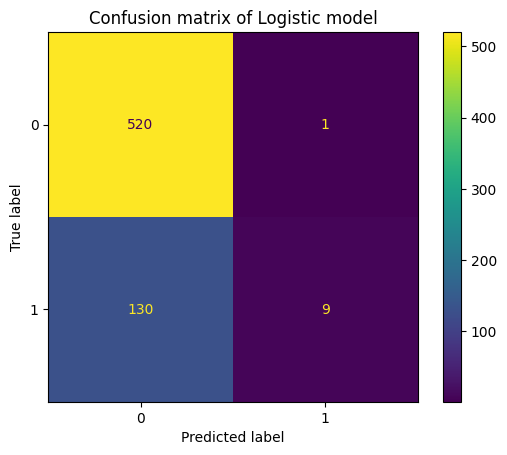

In [36]:
ConfusionMatrixDisplay.from_estimator(best_logistic_model,X_test,y_test)
plt.title("Confusion matrix of Logistic model")

#### Saving the Randomforest Model for depolyment

In [37]:
joblib.dump(best_rf_model, './models/randomforest_model.pkl')


['./models/randomforest_model.pkl']

### feature Importance for Random Forest Model 

In [38]:
#loading the random forest model 
final_model=joblib.load('./models/randomforest_model.pkl')

In [39]:
feat_imp=final_model.feature_importances_

In [40]:
features=X_train.columns.values

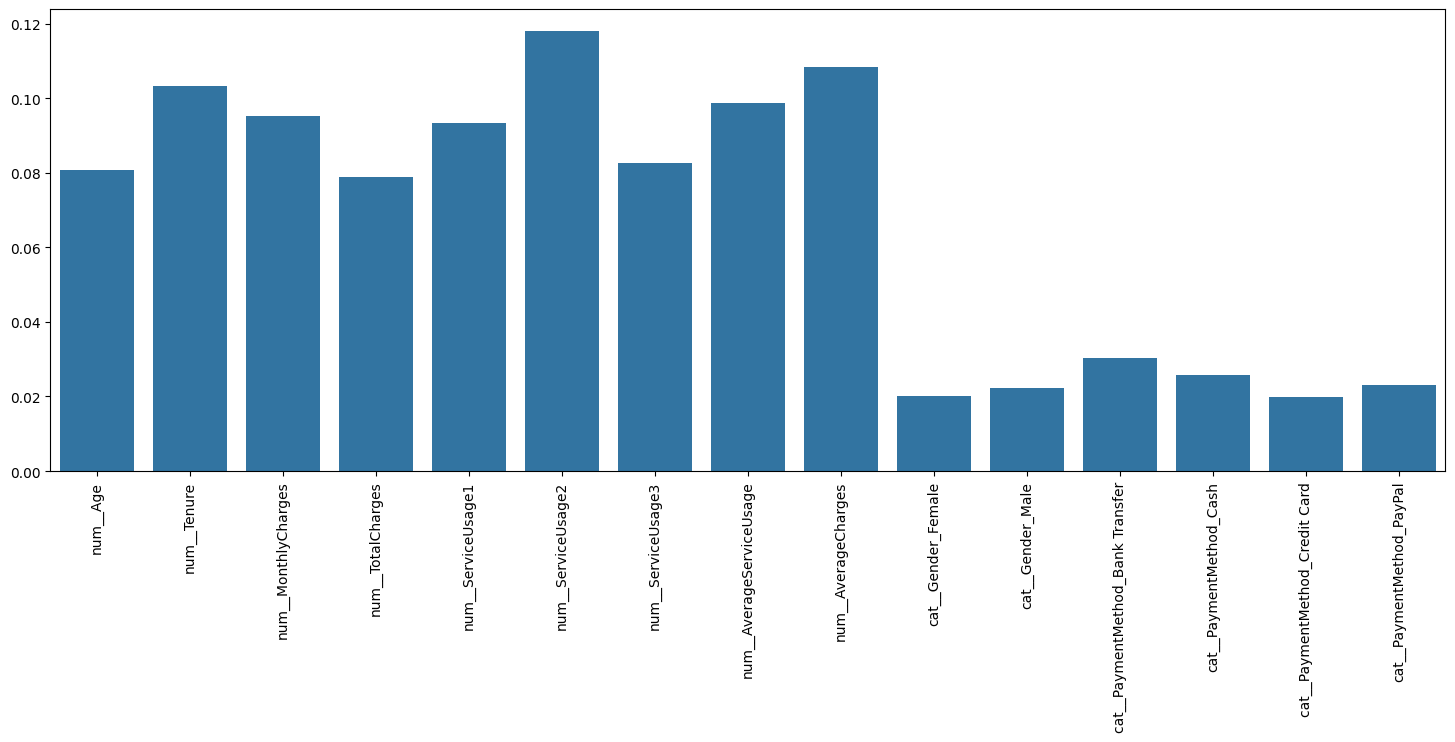

In [41]:
plt.figure(figsize=(18,6))
sns.barplot(x=features,y=feat_imp)
plt.xticks(rotation=90)
plt.rc('xtick',labelsize=7)